# Visualizacion de características en Pytorch

Este notebook muestra cómo visualizar los mapas de activación y los filtros visuales en una red neuronal convolucional básica utilizando PyTorch.


In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Definir una red neuronal convolucional básica
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return x

In [3]:
# Cargar un conjunto de datos de ejemplo (por ejemplo, CIFAR-10)
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

Files already downloaded and verified


In [4]:
# Crear una instancia del modelo
model = CNN()

In [5]:
# Visualizar mapas de activación
def visualize_activation_maps(model, image):
    activations = []
    def hook_fn(module, input, output):
        activations.append(output.squeeze().detach().cpu().numpy())
    
    # Registrar los ganchos en las capas convolucionales
    for module in model.modules():
        if isinstance(module, nn.Conv2d):
            module.register_forward_hook(hook_fn)
    
    # Ejecutar la imagen a través del modelo
    with torch.no_grad():
        model.eval()
        model(image)
    
    # Visualizar los mapas de activación
    for i, activation in enumerate(activations):
        plt.subplot(1, len(activations), i+1)
        plt.imshow(activation[0], cmap='gray')  # Solo mostramos el primer canal (escala de grises)
        plt.axis('off')
    plt.show()

In [6]:
# Visualizar filtros visuales
def visualize_filters(model):
    filters = model.conv1.weight.detach().cpu().numpy()
    for i in range(filters.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(filters[i].transpose(1, 2, 0))
        plt.axis('off')
    plt.show()

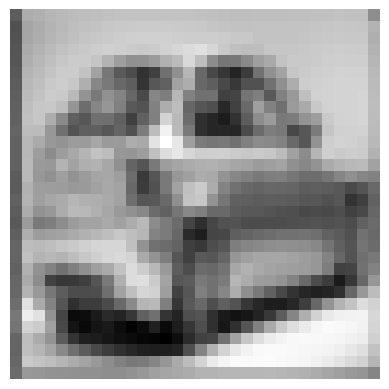

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

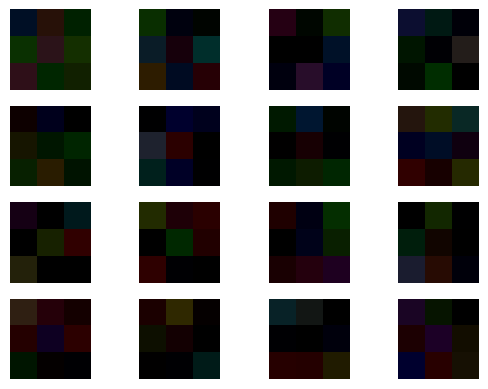

In [7]:
# Obtener una imagen de muestra
image, _ = next(iter(dataloader))

# Visualizar mapas de activación
visualize_activation_maps(model, image)

# Visualizar filtros visuales
visualize_filters(model)

# Ejercicio: Visualización de mapas de activación y filtros visuales

Objetivo: El objetivo de este ejercicio es comprender cómo visualizar los mapas de activación y los filtros visuales en una red neuronal convolucional básica utilizando PyTorch.

Instrucciones:

    1. Importa las bibliotecas necesarias, incluyendo PyTorch y matplotlib.
    2. Crea una red neuronal convolucional básica utilizando PyTorch. Debe tener la siguiente estructura: input > conv1 > relu > pool > conv2 > relu > pool > fc > out
        conv1 debe tener 3 canales de entrada (RGB), 16 filtros de 3x3 con stride y padding =1
        conv 2 debe recibir 16 canales, y definir 32 filtros de tamaño 3x3 y stride y padding = 1
        El número de clases de salida ha de ser 10
    3. Carga una imagen de ejemplo y prepárala para la entrada a la red neuronal convolucional (imagen ```gato.png``` proporcionada)
    4. Realiza una inferencia en la red neuronal convolucional utilizando la imagen de ejemplo.
    5. Visualiza los filtros visuales (pesos) de las capas convolucionales de la red neuronal convolucional.
    6. Visualiza los mapas de activación generados por cada capa convolucional para la imagen de ejemplo.